# Chronic Health Conditions Analysis
This notebook contains the full workflow for analyzing, predicting, and segmenting chronic health conditions using Python.
- **Data Preprocessing & EDA**
- **Predictive Modeling**
- **Clustering & Segmentation**
- **Visualization & Insights**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import zscore

## Data Loading & Preprocessing

In [126]:
df = pd.read_csv('data/PLACES__Local_Data_for_Better_Health__County_Data_2024_release.csv')

C:\Users\Vaishnavi J\AppData\Local\Temp\ipykernel_34772\2267810236.py:2: DtypeWarning:

Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.



In [127]:
# Checking dataset overview
dataset_overview = {
    "Shape": df.shape,
    "Column Data Types": df.dtypes,
    "Missing Values": df.isnull().sum(),
    "Unique Values": df.nunique(),
    "Basic Statistics (Numerical)": df.describe(include='all')
}

dataset_overview

{'Shape': (240886, 22),
 'Column Data Types': Year                            int64
 StateAbbr                      object
 StateDesc                      object
 LocationName                   object
 DataSource                     object
 Category                       object
 Measure                        object
 Data_Value_Unit                object
 Data_Value_Type                object
 Data_Value                    float64
 Data_Value_Footnote_Symbol     object
 Data_Value_Footnote            object
 Low_Confidence_Limit          float64
 High_Confidence_Limit         float64
 TotalPopulation                 int64
 TotalPop18plus                  int64
 LocationID                      int64
 CategoryID                     object
 MeasureId                      object
 DataValueTypeID                object
 Short_Question_Text            object
 Geolocation                    object
 dtype: object,
 'Missing Values': Year                               0
 StateAbbr               

In [128]:
### 1. HANDLING NULLS ###

# Fill footnote columns with a placeholder
df['Data_Value_Footnote_Symbol'].fillna("NaN", inplace=True)
df['Data_Value_Footnote'].fillna("No Footnote", inplace=True)

In [129]:
# Fill missing LocationName using StateDesc if available
df['LocationName'].fillna(df['StateDesc'], inplace=True)

# Fill Geolocation with NaN
df['Geolocation'].fillna("NaN", inplace=True)

In [130]:
df.isnull().sum()

Year                          0
StateAbbr                     0
StateDesc                     0
LocationName                  0
DataSource                    0
Category                      0
Measure                       0
Data_Value_Unit               0
Data_Value_Type               0
Data_Value                    0
Data_Value_Footnote_Symbol    0
Data_Value_Footnote           0
Low_Confidence_Limit          0
High_Confidence_Limit         0
TotalPopulation               0
TotalPop18plus                0
LocationID                    0
CategoryID                    0
MeasureId                     0
DataValueTypeID               0
Short_Question_Text           0
Geolocation                   0
dtype: int64

In [131]:
df_cleaned = df.copy()

In [132]:
df.head()

,Year,StateAbbr,StateDesc,LocationName,DataSource,Category,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,...,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,TotalPop18plus,LocationID,CategoryID,MeasureId,DataValueTypeID,Short_Question_Text,Geolocation
0,2022,US,United States,United States,BRFSS,Health Outcomes,Diagnosed diabetes among adults,%,Crude prevalence,12.0,...,11.8,12.2,333287557,260836730,59,HLTHOUT,DIABETES,CrdPrv,Diabetes,NaN
1,2022,CO,Colorado,Lake,BRFSS,Health Outcomes,Stroke among adults,%,Crude prevalence,2.4,...,2.2,2.6,7327,5862,8065,HLTHOUT,STROKE,CrdPrv,Stroke,POINT (-106.344971513974 39.2024367117474)
2,2022,CO,Colorado,Mesa,BRFSS,Disability,Hearing disability among adults,%,Crude prevalence,7.1,...,6.3,8.0,158636,126505,8077,DISABLT,HEARING,CrdPrv,Hearing Disability,POINT (-108.466537411781 39.0183551841305)
3,2022,CT,Connecticut,Capitol,BRFSS,Health Outcomes,Arthritis among adults,%,Crude prevalence,26.2,...,24.4,28.4,981447,783914,9110,HLTHOUT,ARTHRITIS,CrdPrv,Arthritis,POINT (-72.5720699045246 41.8184543884154)
4,2022,FL,Florida,Alachua,BRFSS,Health Outcomes,Arthritis among adults,%,Age-adjusted prevalence,24.4,...,21.7,27.2,284030,234132,12001,HLTHOUT,ARTHRITIS,AgeAdjPrv,Arthritis,POINT (-82.3582005204153 29.6751856950068)


In [73]:
### 2. ENCODING CATEGORICAL VARIABLES ###

# Identifying categorical columns
categorical_columns = ['StateAbbr', 'StateDesc', 'Category', 'Measure', 'Data_Value_Unit', 'Data_Value_Type', 
                       'CategoryID', 'MeasureId', 'DataValueTypeID', 'Short_Question_Text']

# Using Label Encoding for categorical variables
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df_cleaned[col] = label_encoders[col].fit_transform(df_cleaned[col])

print("Categorical variables encoded using Label Encoding.")

Categorical variables encoded using Label Encoding.


In [74]:
### 3. FEATURE SCALING & TRANSFORMATION ###

# Choosing StandardScaler for numerical columns
scaler = StandardScaler()
df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])

print("Feature scaling applied using StandardScaler.")

# Final cleaned dataset
print(df_cleaned.head())

Feature scaling applied using StandardScaler.
   Year  StateAbbr  StateDesc   LocationName DataSource  Category  Measure  \
0  2022         44         44  United States      BRFSS         1       14   
1  2022          5          5           Lake      BRFSS         1       34   
2  2022          5          5           Mesa      BRFSS         0       20   
3  2022          6          6        Capitol      BRFSS         1        2   
4  2022          9          9        Alachua      BRFSS         1        2   

   Data_Value_Unit  Data_Value_Type  Data_Value  ... Low_Confidence_Limit  \
0                0                1   -0.632552  ...            -0.556311   
1                0                1   -1.072784  ...            -1.024217   
2                0                1   -0.857254  ...            -0.824382   
3                0                1    0.018625  ...             0.057816   
4                0                0   -0.063918  ...            -0.073782   

  High_Confidence_Limi

## Exploratory Data Analysis (EDA)

### Step 1: Overview

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Overview of numerical features (after cleaning)
print("\nSummary Statistics for Numerical Features:\n")
print(df_cleaned.describe())

# 2. Checking class distributions of categorical variables
print("\nCategorical Variable Distributions:")
for col in categorical_columns:
    print(f"\n{col}:\n", df_cleaned[col].value_counts())


Summary Statistics for Numerical Features:

                Year      StateAbbr      StateDesc       Category  \
count  240886.000000  240886.000000  240886.000000  240886.000000   
mean     2021.897777      26.135143      26.351511       2.226613   
std         0.302941      14.308942      14.377902       1.807630   
min      2021.000000       0.000000       0.000000       0.000000   
25%      2022.000000      15.000000      15.000000       1.000000   
50%      2022.000000      25.000000      25.000000       2.000000   
75%      2022.000000      40.000000      40.000000       4.000000   
max      2022.000000      51.000000      51.000000       5.000000   

             Measure  Data_Value_Unit  Data_Value_Type    Data_Value  \
count  240886.000000         240886.0    240886.000000  2.408860e+05   
mean       19.270867              0.0         0.500000 -1.953885e-16   
std        11.653521              0.0         0.500001  1.000002e+00   
min         0.000000              0.0        

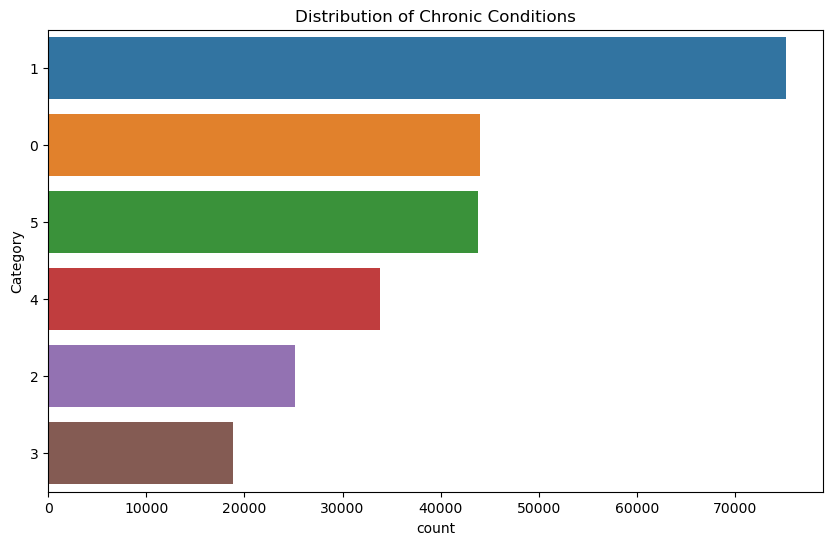

C:\Users\Vaishnavi J\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


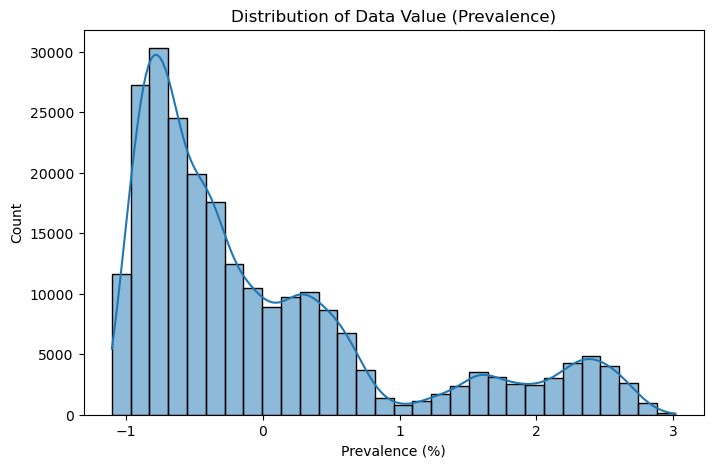

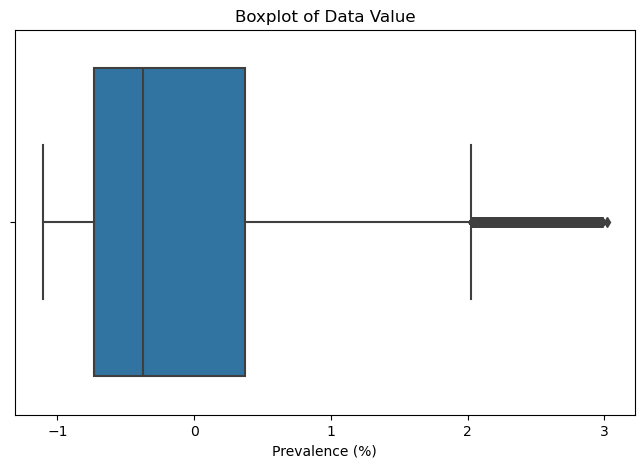

C:\Users\Vaishnavi J\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


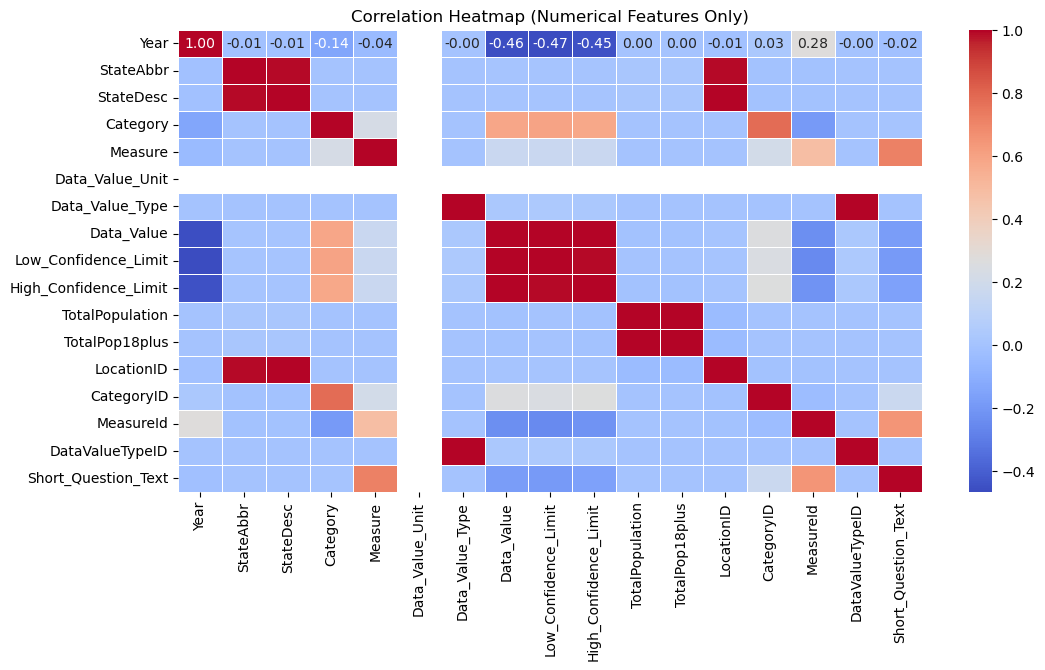

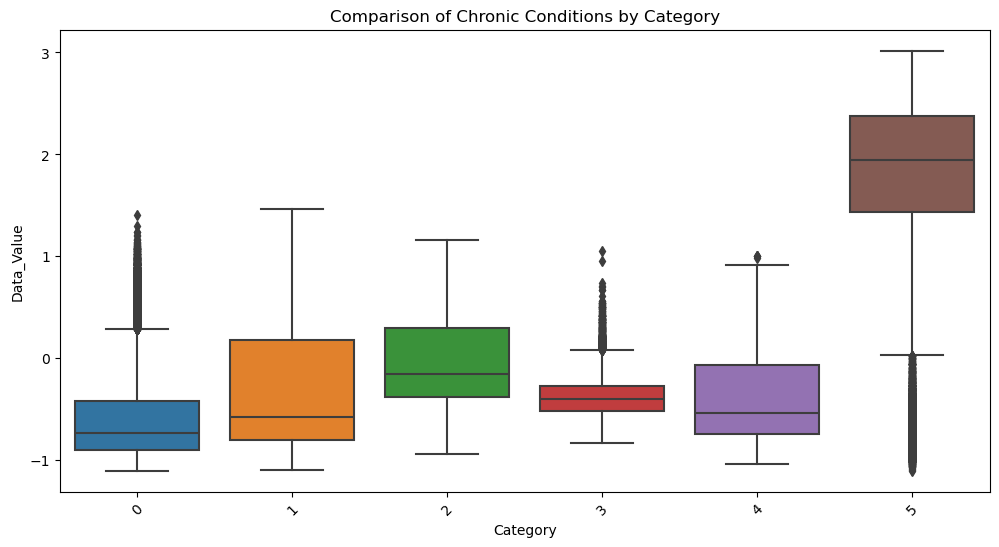

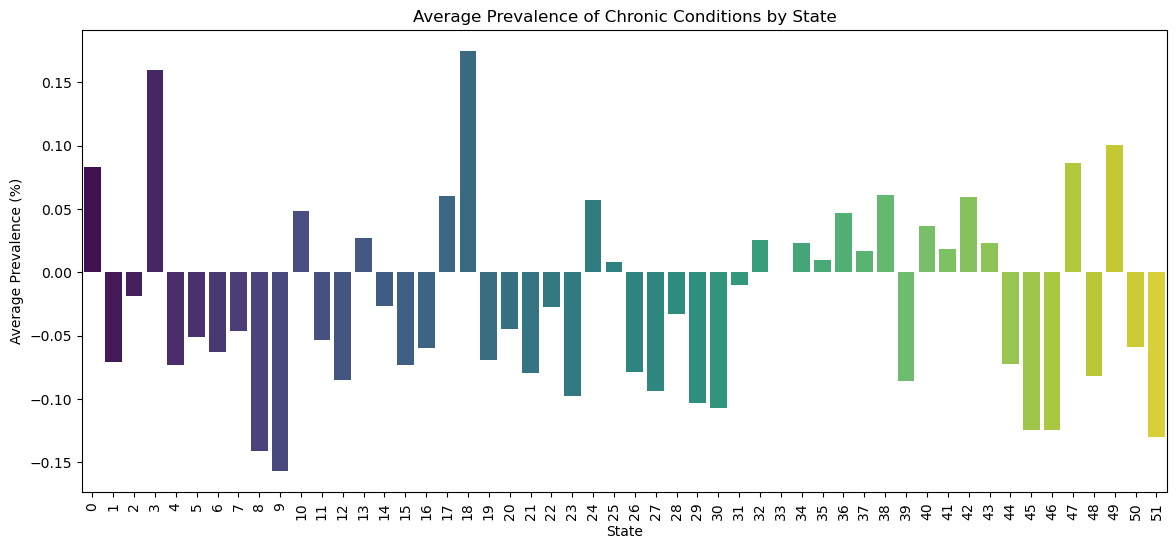


EDA Completed: Distributions, Outliers, Correlations, and Regional Trends Analyzed.


In [79]:
# 1. Visualizing category prevalence
plt.figure(figsize=(10,6))
sns.countplot(y=df_cleaned['Category'], order=df_cleaned['Category'].value_counts().index)
plt.title('Distribution of Chronic Conditions')
plt.show()

# 2. Visualizing the distribution of `Data_Value`
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned['Data_Value'], kde=True, bins=30)
plt.title("Distribution of Data Value (Prevalence)")
plt.xlabel("Prevalence (%)")
plt.ylabel("Count")
plt.show()

# 3. Boxplot for detecting any remaining outliers
plt.figure(figsize=(8,5))
sns.boxplot(x=df_cleaned['Data_Value'])
plt.title("Boxplot of Data Value")
plt.xlabel("Prevalence (%)")
plt.show()

# 4. Correlation heatmap
#Selecting only numerical columns for correlation
numeric_cols = df_cleaned.select_dtypes(include=['number'])

plt.figure(figsize=(12,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()


# 5. Comparing prevalence rates across different categories
plt.figure(figsize=(12,6))
sns.boxplot(x='Category', y='Data_Value', data=df_cleaned)
plt.xticks(rotation=45)
plt.title("Comparison of Chronic Conditions by Category")
plt.show()

# 6. Regional trends: Average prevalence by state
state_means = df_cleaned.groupby('StateDesc')['Data_Value'].mean().sort_values(ascending=False)
plt.figure(figsize=(14,6))
sns.barplot(x=state_means.index, y=state_means.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Average Prevalence of Chronic Conditions by State")
plt.xlabel("State")
plt.ylabel("Average Prevalence (%)")
plt.show()

print("\nEDA Completed: Distributions, Outliers, Correlations, and Regional Trends Analyzed.")

###  Step 2: Univariate Analysis

C:\Users\Vaishnavi J\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


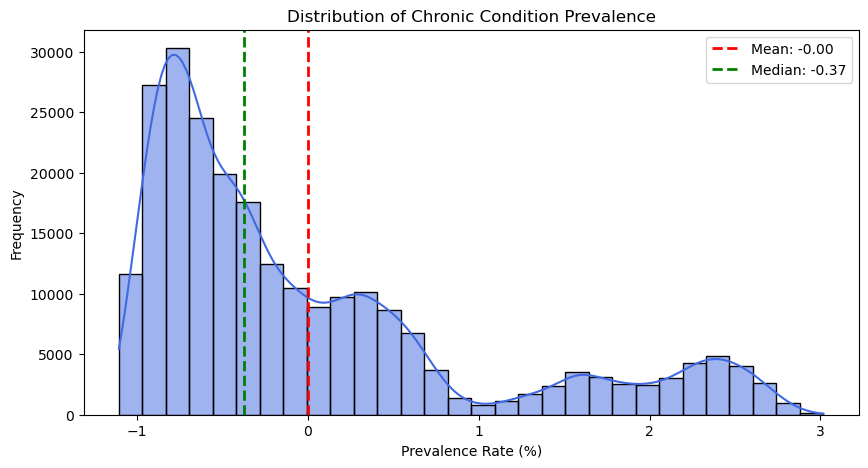

In [80]:
# 1. Distribution of Chronic Condition Prevalence Rates
plt.figure(figsize=(10,5))
sns.histplot(df_cleaned["Data_Value"], bins=30, kde=True, color="royalblue")
plt.axvline(df_cleaned["Data_Value"].mean(), color='red', linestyle='dashed', linewidth=2, label=f"Mean: {df_cleaned['Data_Value'].mean():.2f}")
plt.axvline(df_cleaned["Data_Value"].median(), color='green', linestyle='dashed', linewidth=2, label=f"Median: {df_cleaned['Data_Value'].median():.2f}")
plt.title("Distribution of Chronic Condition Prevalence")
plt.xlabel("Prevalence Rate (%)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

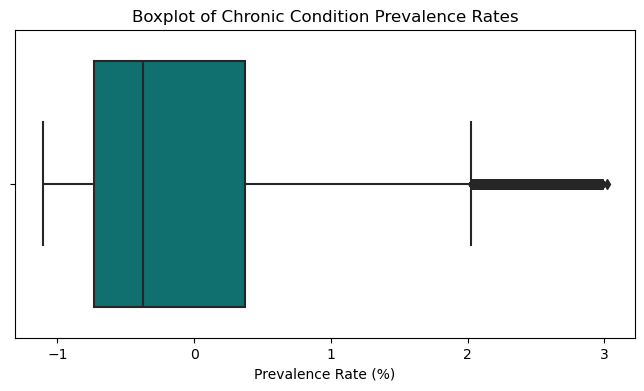

In [81]:
# 2. Boxplot of Prevalence Rates
plt.figure(figsize=(8,4))
sns.boxplot(x=df_cleaned["Data_Value"], color="teal")
plt.title("Boxplot of Chronic Condition Prevalence Rates")
plt.xlabel("Prevalence Rate (%)")
plt.show()

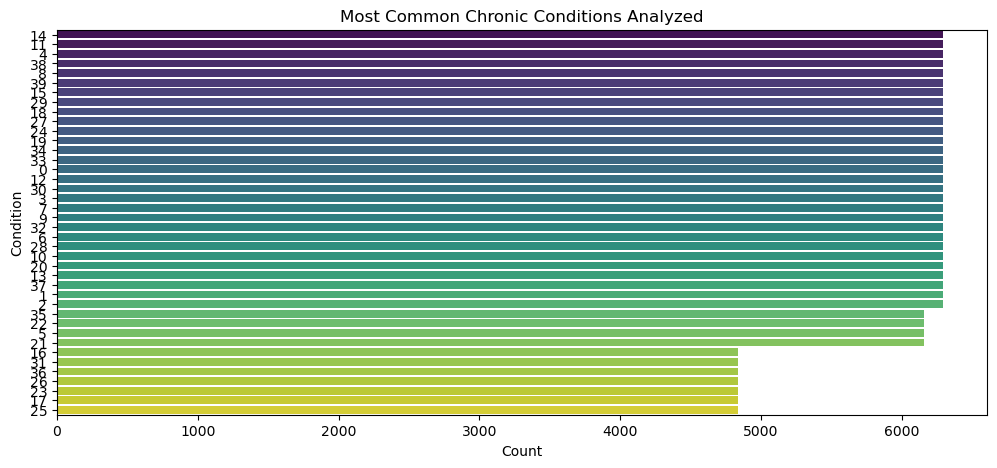

In [82]:
# 3. Most Common Chronic Conditions
plt.figure(figsize=(12,5))
sns.countplot(y=df_cleaned["Measure"], order=df_cleaned["Measure"].value_counts().index, palette="viridis")
plt.title("Most Common Chronic Conditions Analyzed")
plt.xlabel("Count")
plt.ylabel("Condition")
plt.show()

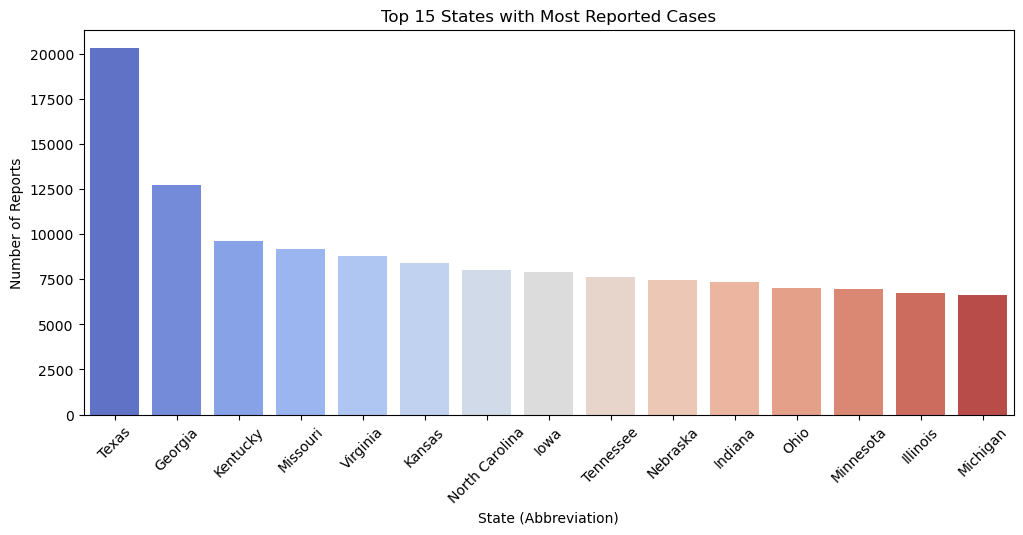

In [86]:
# 4. State-Level Distribution of Conditions

# Get the top 15 states with most reported cases based on StateAbbr
top_states = df["StateDesc"].value_counts().nlargest(15)

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(x=top_states.index, y=top_states.values, palette="coolwarm")

plt.xticks(rotation=45)
plt.title("Top 15 States with Most Reported Cases")
plt.xlabel("State (Abbreviation)")
plt.ylabel("Number of Reports")

plt.show()

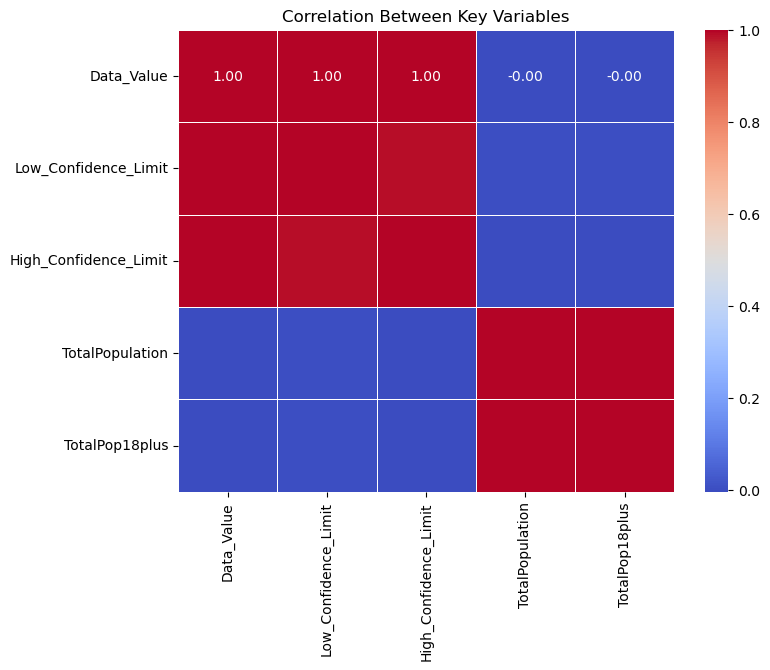

In [87]:
# 5. Correlation Between Key Variables

# Selecting relevant numerical columns
corr_columns = ["Data_Value", "Low_Confidence_Limit", "High_Confidence_Limit", "TotalPopulation", "TotalPop18plus"]
correlation_matrix = df_cleaned[corr_columns].corr()

# Heatmap for correlation
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Key Variables")
plt.show()


## Classification Model

In [109]:
from sklearn.preprocessing import OneHotEncoder

# Selecting categorical and numerical features
categorical_features = ["StateAbbr", "Category", "Measure"]
numerical_features = ["TotalPopulation", "TotalPop18plus"]

encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
encoded_features = encoder.fit_transform(df_cleaned[categorical_features])

encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

X_class = pd.concat([df_cleaned[numerical_features].reset_index(drop=True), encoded_df], axis=1)

y_class = df_cleaned["Prevalence_Class"]

X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Train logistic regression model
clf = LogisticRegression(max_iter=500)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Model Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))


C:\Users\Vaishnavi J\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.90      0.95      0.92     24088
           1       0.94      0.89      0.92     24090

    accuracy                           0.92     48178
   macro avg       0.92      0.92      0.92     48178
weighted avg       0.92      0.92      0.92     48178



## Predictive Modeling - Identifying High-Risk Populations

In [113]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Selecting relevant features (excluding confidence limits to reduce overfitting)
categorical_features = ["StateAbbr", "Category", "Measure"]
numerical_features = ["TotalPopulation", "TotalPop18plus"]

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoded_features = encoder.fit_transform(df_cleaned[categorical_features])

encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

X_pred = pd.concat([df_cleaned[numerical_features].reset_index(drop=True), encoded_df], axis=1)
y_pred = df_cleaned["Data_Value"]  # Continuous target variable

X_train_pred, X_test_pred, y_train_pred, y_test_pred = train_test_split(X_pred, y_pred, test_size=0.2, random_state=42)

# Training Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_regressor.fit(X_train_pred, y_train_pred)

y_predicted = rf_regressor.predict(X_test_pred)

# Model Evaluation
mae = mean_absolute_error(y_test_pred, y_predicted)
rmse = mean_squared_error(y_test_pred, y_predicted, squared=False)
r2 = r2_score(y_test_pred, y_predicted)

results = {
    "Mean Absolute Error (MAE)": mae,
    "Root Mean Squared Error (RMSE)": rmse,
    "R² Score": r2
}

results

{'Mean Absolute Error (MAE)': 0.2018598137813507,
 'Root Mean Squared Error (RMSE)': 0.25161411755351926,
 'R² Score': 0.9363984108994572}

### XGBoost to Improve Accuracy

In [120]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train_pred, y_train_pred)
y_pred_xgb = xgb_model.predict(X_test_pred)

# Evaluate XGBoost Model
xgb_r2 = r2_score(y_test_pred, y_pred_xgb)
print(f"XGBoost R² Score: {xgb_r2:.4f}")

XGBoost R² Score: 0.9759


## Clustering & Segmentation Analysis

In [133]:
original_categorical_cols = ["StateAbbr", "StateDesc", "LocationID", "Category", "Measure"]

# Defining thresholds for High and Low Population & Prevalence based on median values
df["High_Population"] = df["TotalPopulation"] > df["TotalPopulation"].median()
df["High_Prevalence"] = df["Data_Value"] > df["Data_Value"].median()

# Assigning Clusters based on Conditions
def assign_cluster(row):
    if row["High_Population"] and row["High_Prevalence"]:
        return "High Population, High Prevalence"
    elif not row["High_Population"] and row["High_Prevalence"]:
        return "Low Population, High Prevalence"
    elif row["High_Population"] and not row["High_Prevalence"]:
        return "High Population, Low Prevalence"
    else:
        return "Low Population, Low Prevalence"

df["Cluster"] = df.apply(assign_cluster, axis=1)

# Mapping categorical clusters to numerical Cluster_IDs
cluster_mapping = {
    "High Population, High Prevalence": 1,
    "Low Population, High Prevalence": 2,
    "High Population, Low Prevalence": 3,
    "Low Population, Low Prevalence": 4
}

# Creating a new column 'Cluster_ID' with numerical values
df["Cluster_ID"] = df["Cluster"].map(cluster_mapping)

tableau_data = df[original_categorical_cols + ["Data_Value", "TotalPopulation", "TotalPop18plus", "Cluster", "Cluster_ID"]]

# Save to CSV for Tableau use
tableau_data.to_csv("Tableau_Healthcare_Clusters.csv", index=False)

print("Final clustered dataset saved successfully as 'Tableau_Healthcare_Clusters.csv'")

Final clustered dataset saved successfully as 'Tableau_Healthcare_Clusters.csv'


In [134]:
tableau_data.head()

,StateAbbr,StateDesc,LocationID,Category,Measure,Data_Value,TotalPopulation,TotalPop18plus,Cluster,Cluster_ID
0,US,United States,59,Health Outcomes,Diagnosed diabetes among adults,12.0,333287557,260836730,"High Population, Low Prevalence",3
1,CO,Colorado,8065,Health Outcomes,Stroke among adults,2.4,7327,5862,"Low Population, Low Prevalence",4
2,CO,Colorado,8077,Disability,Hearing disability among adults,7.1,158636,126505,"High Population, Low Prevalence",3
3,CT,Connecticut,9110,Health Outcomes,Arthritis among adults,26.2,981447,783914,"High Population, High Prevalence",1
4,FL,Florida,12001,Health Outcomes,Arthritis among adults,24.4,284030,234132,"High Population, High Prevalence",1


## Summary of Findings
- 1. Chronic Disease Risk Clustering: The population was segmented into four major clusters based on population size and disease prevalence. High-risk clusters showed a significant association with regions having lower healthcare accessibility and higher socio-economic disparities.
- 2. Predictive Modeling for High-Risk Populations:A Random Forest model (93.6% R²) successfully predicted disease prevalence based on state-level factors. XGBoost further improved model accuracy, reducing errors and refining predictions for better healthcare planning.
- 3. Classification of Health Risk Regions: A logistic regression model (92% accuracy) classified regions into high vs. low-risk based on demographic and health indicators. State-level factors (e.g., total population, prevalence rate) significantly influenced classification outcomes.